In [18]:
!pip install scikit-learn

  Using cached scikit_learn-1.1.3-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.9.3-cp38-cp38-win_amd64.whl (39.8 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


You should consider upgrading via the 'c:\git\machine-learning-from-scratch\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
import math
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

Suppose that we want to make linear model with neural networks.

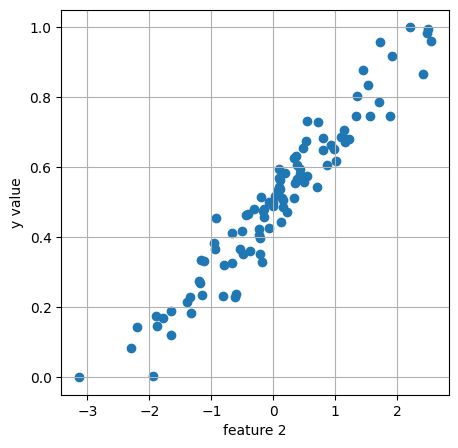

In [148]:
# Building regression dataset using sklearn
n_fitur = 1
X_data, y_data = make_regression(n_samples=100, n_features=n_fitur, bias=0.1, noise=20, shuffle=True, random_state=8)
# normalize the data
y_data =(y_data - y_data.min()) / (y_data.max() - y_data.min())
# Visualize data
fig, axs = plt.subplots(1, n_fitur, figsize=(5*n_fitur, 5))
if n_fitur > 1:
    for i, ax in enumerate(axs):
        x_dat = X_data[:, i]
        ax.scatter(x_dat, y_data)
        ax.grid()
        ax.set_xlabel('feature %d' %i)
        ax.set_ylabel('y value')
else:
    axs.scatter(X_data, y_data)
    axs.grid()
    axs.set_xlabel('feature %d' %i)
    axs.set_ylabel('y value')
plt.show()

At first, we want to build simple 1 hidden layer NN with 5 nodes. This model only consist weights as the parameter. We will build single hidden layer with 5 nodes. Below is the visualization of our simple neural network. As our journey continue, we will gradually upgrade our model.

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [149]:
class NeuralNetwork_v1():
    def __init__(self, x_shape, y_shape, n_node=4):
        self.weights1 = np.random.rand(x_shape[1], n_node)
        self.weights2 = np.random.rand(n_node, y_shape[1])
        self.output = np.zeros(y_shape[1])
    
    def feedforward(self, x):
        self.input = x
        self.z1 = np.dot(self.input, self.weights1)
        self.layer1 = sigmoid(self.z1)
        self.z2 = np.dot(self.layer1, self.weights2)
        self.output = sigmoid(self.z2)
        
    def backpropagation(self, y, learning_rate):
        self.y = y
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        self.d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.z2)))
        self.d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.z2), self.weights2.T)\
                                                 * sigmoid_derivative(self.z1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += self.d_weights1*learning_rate
        self.weights2 += self.d_weights2*learning_rate
    
    def calculate_loss(self):
        # using sum of square error
        loss = np.dot((self.y - self.output).T, (self.y - self.output))[0][0]
        return loss
    
    def train(self, x_data, y_data, epochs, learning_rate=0.01, verbose=0):
        history = {'loss':[], 'epochs': []}
        for i in range(epochs):
            self.feedforward(x_data)
            self.backpropagation(y_data, learning_rate)
            loss = self.calculate_loss()
            history['loss'].append(loss)
            history['epochs'].append(i)
            if verbose == 1:
                print('epoch {} ==> loss: {:.3f}'.format(i+1, loss))
        return history
    
    def predict(self, x):
        self.feedforward(x)
        return self.output

In [150]:
y_data = y_data.reshape(-1, 1)
NN_model = NeuralNetwork_v1(X_data.shape, y_data.shape, n_node=4)
history = NN_model.train(X_data, y_data, epochs=1000, learning_rate=0.01, verbose=1)

epoch 1 ==> loss: 8.141
epoch 2 ==> loss: 7.529
epoch 3 ==> loss: 6.991
epoch 4 ==> loss: 6.526
epoch 5 ==> loss: 6.132
epoch 6 ==> loss: 5.802
epoch 7 ==> loss: 5.529
epoch 8 ==> loss: 5.306
epoch 9 ==> loss: 5.124
epoch 10 ==> loss: 4.976
epoch 11 ==> loss: 4.855
epoch 12 ==> loss: 4.756
epoch 13 ==> loss: 4.674
epoch 14 ==> loss: 4.605
epoch 15 ==> loss: 4.546
epoch 16 ==> loss: 4.495
epoch 17 ==> loss: 4.450
epoch 18 ==> loss: 4.409
epoch 19 ==> loss: 4.372
epoch 20 ==> loss: 4.336
epoch 21 ==> loss: 4.303
epoch 22 ==> loss: 4.271
epoch 23 ==> loss: 4.240
epoch 24 ==> loss: 4.209
epoch 25 ==> loss: 4.178
epoch 26 ==> loss: 4.148
epoch 27 ==> loss: 4.118
epoch 28 ==> loss: 4.087
epoch 29 ==> loss: 4.057
epoch 30 ==> loss: 4.026
epoch 31 ==> loss: 3.995
epoch 32 ==> loss: 3.964
epoch 33 ==> loss: 3.932
epoch 34 ==> loss: 3.899
epoch 35 ==> loss: 3.866
epoch 36 ==> loss: 3.833
epoch 37 ==> loss: 3.799
epoch 38 ==> loss: 3.765
epoch 39 ==> loss: 3.730
epoch 40 ==> loss: 3.694
epoch 41 

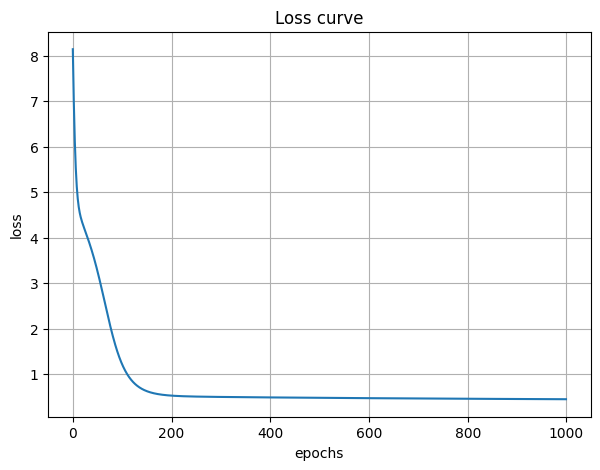

In [151]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax.plot(history['epochs'], history['loss'])
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_title('Loss curve')
ax.grid()

In [152]:
# prediction
if n_fitur > 1:
    x_test = np.zeros((6000, n_fitur))
    for i in range(n_fitur):
        x_test[:, i] = np.arange(-3, 3, 0.001)

    y_pred = NN_model.predict(x_test)
else:
    x_test = np.arange(-3, 3, 0.001)
    x_test = x_test.reshape(-1, 1)
    y_pred = NN_model.predict(x_test)

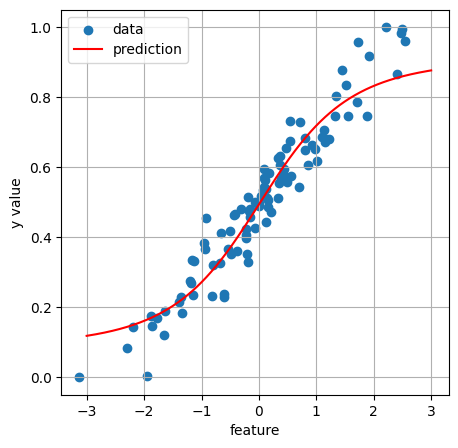

In [153]:
# Visualize data
fig, axs = plt.subplots(1, n_fitur, figsize=(5*n_fitur, 5))
if n_fitur > 1:
    for i, ax in enumerate(axs):
        x_dat = X_data[:, i]
        x_tes = x_test[:, i]
        ax.scatter(x_dat, y_data, label='data')
        ax.plot(x_tes, y_pred, color='red', label='prediction')
        ax.grid()
        ax.legend()
        ax.set_xlabel('feature %d' %(i+1))
        ax.set_ylabel('y value')
else:
    axs.scatter(X_data, y_data, label='data')
    axs.plot(x_test, y_pred, color='red', label='prediction')
    axs.grid()
    axs.legend()
    axs.set_xlabel('feature')
    axs.set_ylabel('y value')
plt.show()

Our model converges! That's a good sign that we on the right track. However the prediction is still not good enough. Now let's upgrade our model to version 2 by adding biases. 